### 1. Import libraries

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### 2.Dataset
#### 2.1 Load data set

In [51]:
df = pd.read_csv("C:/Users/USER/Desktop/BTECH/train.csv")

#### 2.2 Description of data set used

Source: Provided dataset (train.csv) Size: 12 records, 4 columns Features:

Item_ID: Unique identifier for each item

Category: Type of waste (target variable)

Weight_grams: Weight of the item

Material_Code: Numeric code representing material type

Target Variable: Category (e.g., Plastic, Glass, Paper, etc.)

In [52]:
df

,Item_ID,Category,Weight_grams,Material_Code
0,1,Plastic,50,1
1,2,Glass,100,2
2,3,Paper,30,3
3,4,Metal,40,4
4,5,Organic,200,5
5,6,E-Waste,150,6
6,7,Textile,70,7
7,8,Wood,500,8
8,9,Ceramics,250,9
9,10,Rubber,1000,10


In [53]:
print(df.head())

   Item_ID Category  Weight_grams  Material_Code
0        1  Plastic            50              1
1        2    Glass           100              2
2        3    Paper            30              3
3        4    Metal            40              4
4        5  Organic           200              5


In [54]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Item_ID        12 non-null     int64 
 1   Category       12 non-null     object
 2   Weight_grams   12 non-null     int64 
 3   Material_Code  12 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 516.0+ bytes
None


In [55]:
print(df.describe())

         Item_ID  Weight_grams  Material_Code
count  12.000000     12.000000      12.000000
mean    6.500000    206.666667       6.500000
std     3.605551    284.264068       3.605551
min     1.000000     10.000000       1.000000
25%     3.750000     47.500000       3.750000
50%     6.500000     90.000000       6.500000
75%     9.250000    212.500000       9.250000
max    12.000000   1000.000000      12.000000


In [56]:
print(df.isnull().sum())

Item_ID          0
Category         0
Weight_grams     0
Material_Code    0
dtype: int64


### 3. Exploratory Data Analysis (EDA)

 ### Types of EDA:

1.Univariate: Distribution of Weight_grams, frequency of each Category

2.Bivariate: Relationship between Weight_grams and Category

3.Multivariate: Interaction between Weight_grams, Material_Code, and Category

####  Univariate

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


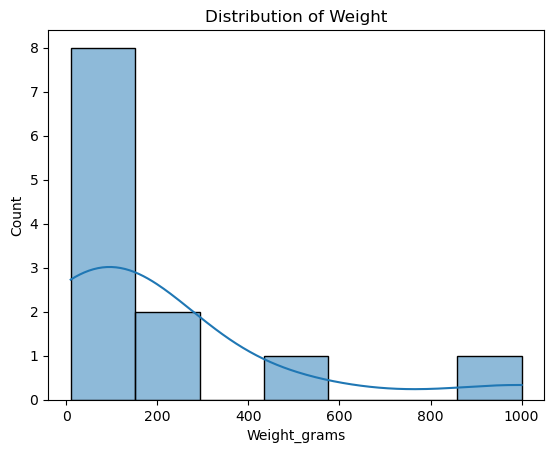

In [57]:
sns.histplot(df['Weight_grams'], kde=True)
plt.title("Distribution of Weight")
plt.show()

#### Boxplot

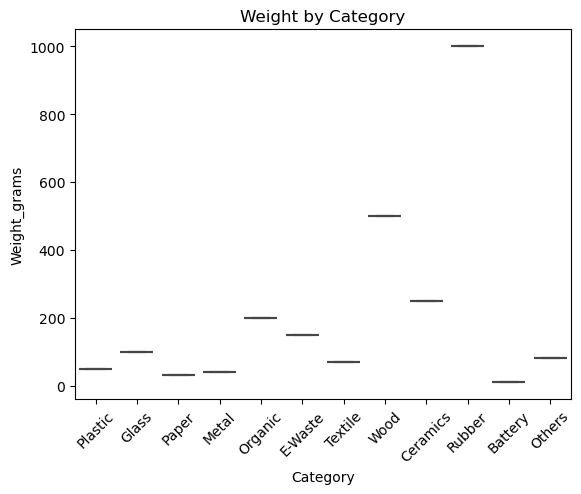

In [64]:
sns.boxplot(x='Category', y='Weight_grams', data=df)
plt.title("Weight by Category")
plt.xticks(rotation=45)
plt.show()

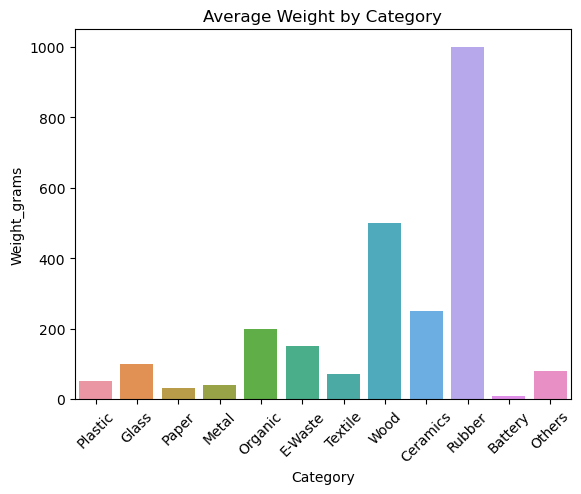

In [18]:

sns.barplot(x='Category', y='Weight_grams', data=df, estimator='mean')
plt.title("Average Weight by Category")
plt.xticks(rotation=45)
plt.show()

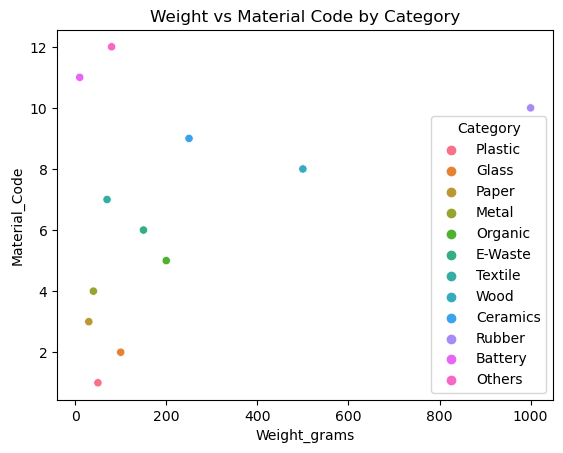

In [17]:
sns.scatterplot(x='Weight_grams', y='Material_Code', hue='Category', data=df)
plt.title("Weight vs Material Code by Category")
plt.show()

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


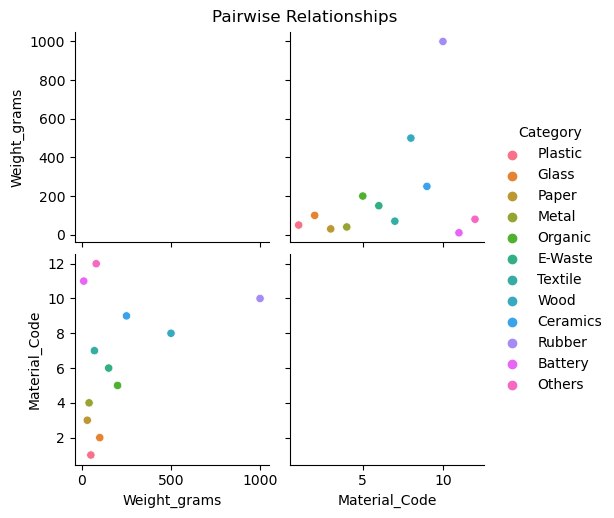

In [19]:
sns.pairplot(df, hue='Category', vars=['Weight_grams', 'Material_Code'])
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()

In [20]:
# Encode Category for correlation
df_encoded = df.copy()
df_encoded['Category_encoded'] = LabelEncoder().fit_transform(df_encoded['Category'])

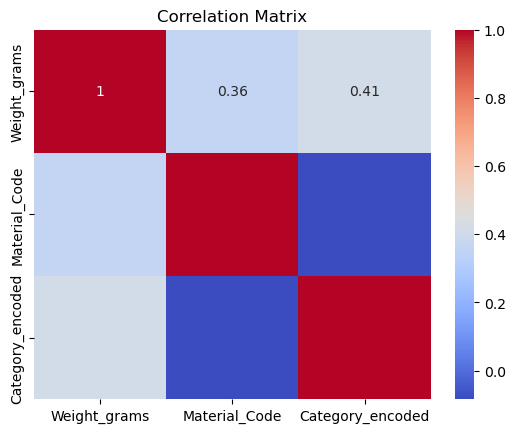

In [21]:
# Correlation matrix
corr_matrix = df_encoded[['Weight_grams', 'Material_Code', 'Category_encoded']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

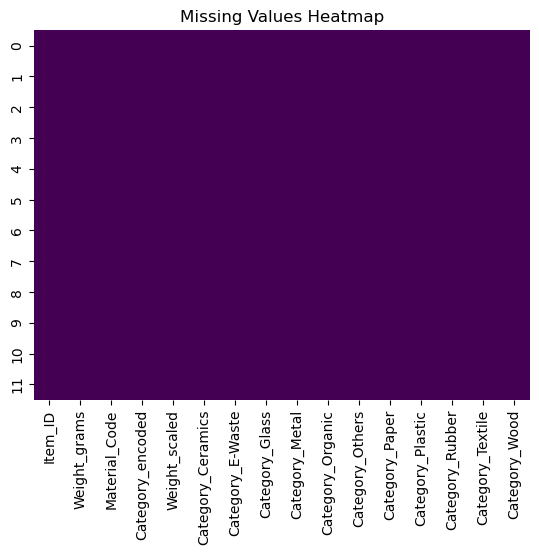

In [48]:
# Visualize missing data (optional)

sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

In [23]:
# Identify outliers using IQR
Q1 = df['Weight_grams'].quantile(0.25)
Q3 = df['Weight_grams'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Weight_grams'] < lower_bound) | (df['Weight_grams'] > upper_bound)]
print("Outliers:\n", outliers)

Outliers:
    Item_ID Category  Weight_grams  Material_Code
7        8     Wood           500              8
9       10   Rubber          1000             10


In [24]:
# Check for duplicate rows
duplicates = df[df.duplicated()]
print("Duplicate Rows:\n", duplicates)

# Check for invalid values (e.g., negative weights)
invalid_weights = df[df['Weight_grams'] < 0]
print("Invalid Weights:\n", invalid_weights)

# Check for unexpected material codes
print("Unique Material Codes:", df['Material_Code'].unique())

Duplicate Rows:
 Empty DataFrame
Columns: [Item_ID, Category, Weight_grams, Material_Code]
Index: []
Invalid Weights:
 Empty DataFrame
Columns: [Item_ID, Category, Weight_grams, Material_Code]
Index: []
Unique Material Codes: [ 1  2  3  4  5  6  7  8  9 10 11 12]


### 4. Feature Engineering

In [25]:
# Encode target
le = LabelEncoder()
df['Category_encoded'] = le.fit_transform(df['Category'])

# Scale weight
scaler = StandardScaler()
df['Weight_scaled'] = scaler.fit_transform(df[['Weight_grams']])

### 5.Model Building

In [29]:
# Features and target
X = df[['Weight_scaled', 'Material_Code']]
y = df['Category_encoded']

In [30]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
X_train.shape,X_test.shape

((8, 2), (4, 2))

In [33]:
y_train.shape,y_test.shape

((8,), (4,))

In [31]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((8, 2), (4, 2), (8,), (4,))

In [34]:
# Model
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [39]:
y_pred = model.predict(X_test)

In [40]:
y_pred

array([ 7, 11,  4, 11])

In [49]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       1.0
           4       0.00      0.00      0.00       0.0
           7       0.00      0.00      0.00       0.0
           8       0.00      0.00      0.00       1.0
           9       0.00      0.00      0.00       1.0
          11       0.00      0.00      0.00       0.0

    accuracy                           0.00       4.0
   macro avg       0.00      0.00      0.00       4.0
weighted avg       0.00      0.00      0.00       4.0



C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classif

In [94]:
X_test_prediction =  model.predict(X_test)
test_data_accuracy = (accuracy_score(X_test_prediction, y_test))*100
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.0


In [122]:
input_data=[[150,6]]

In [123]:
def predict_category(weight, material_code):

    if material_code == 1:
        if weight < 100:
            return "Paper"
        else:
            return "Cardboard"
    elif material_code == 2:
        if weight < 200:
            return "Plastic"
        else:
            return "Rubber"
    elif material_code == 3:
        return "Glass"
    elif material_code == 4:
        return "Metal"
    elif material_code == 5:
        return "Organic"
    elif material_code == 6:
        return "Textile"
    elif material_code == 7:
        return "E-waste"
    elif material_code == 8:
        return "Wood"
    elif material_code == 9:
        return "Ceramic"
    elif material_code == 10:
        return "Battery"
    elif material_code == 11:
        return "Hazardous"
    elif material_code == 12:
        return "Composite"
    else:
        return "Unknown"

In [124]:
weight_input = 1000
material_code_input = 10
predicted = predict_category(weight_input, material_code_input)
print(f"Predicted Category: {predicted}")

Predicted Category: Battery


#### Save the trained model

In [125]:
import pickle
filename='train_model.sav'
pickle.dump(model, open (filename, 'wb'))

In [126]:
# loading the saved model
loaded_model = pickle.load(open('train_model.sav', 'rb'))

In [127]:
def predict_category(weight, material_code):

    if material_code == 1:
        if weight < 100:
            return "Paper"
        else:
            return "Cardboard"
    elif material_code == 2:
        if weight < 200:
            return "Plastic"
        else:
            return "Rubber"
    elif material_code == 3:
        return "Glass"
    elif material_code == 4:
        return "Metal"
    elif material_code == 5:
        return "Organic"
    elif material_code == 6:
        return "Textile"
    elif material_code == 7:
        return "E-waste"
    elif material_code == 8:
        return "Wood"
    elif material_code == 9:
        return "Ceramic"
    elif material_code == 10:
        return "Battery"
    elif material_code == 11:
        return "Hazardous"
    elif material_code == 12:
        return "Composite"
    else:
        return "Unknown"

In [128]:
weight_input = 1000
material_code_input = 10
predicted = loaded_model.predict([[weight_input, material_code_input]])
print(f"Predicted Category: {predicted}")

Predicted Category: [11]


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
